In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head(6)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# Exploring data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [4]:
df_train.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train = df_train.drop('cabin',1)

# Feature: age, filling the missing using other features like name

In [6]:
temp_title = df_train['name'].str.split(', ').str[1]
df_train['title']=temp_title.str.split('.').str[0]

In [7]:
df_train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [8]:
# merging same title classes 
df_train['title'].replace('Ms','Miss',inplace = True)
df_train['title'].replace('Mlle','Miss',inplace = True)
df_train['title'].replace('the Countess','Lady',inplace = True)
df_train['title'].replace('Mme','Mrs',inplace = True)
df_train['title'].replace('Jonkheer','Sir',inplace = True)
df_train['title'].replace('Don','Sir',inplace = True)
df_train['title'].replace('Col','Officer',inplace = True)
df_train['title'].replace('Capt','Officer',inplace = True)
df_train['title'].replace('Major','Officer',inplace = True)

In [9]:
df_train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Rev', 'Dr', 'Officer', 'Lady'], dtype=object)

In [10]:
missing_age_df = df_train[df_train['age'].isnull()]

In [11]:
missing_age_df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [12]:
for i in missing_age_df['title'].unique():
    median = df_train.age[df_train['title']==i].median()
    df_train.age[df_train['age'].isnull()] = median    
    #mean(df_train['age']]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [13]:
df_train[df_train['embarked'].isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs


#According to wikipedia these two survivors got in to tiataic in Southampton
https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [14]:
df_train["embarked"] = df_train["embarked"].fillna('S').astype(object)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
embarked    891 non-null object
title       891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


# Feature: pclass

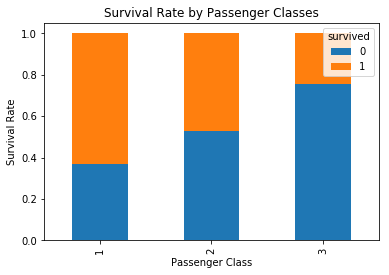

In [16]:
pclass_xt = pd.crosstab(df_train['pclass'], df_train['survived'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

pclass has significant impact on the survival feature

# Feature:sex

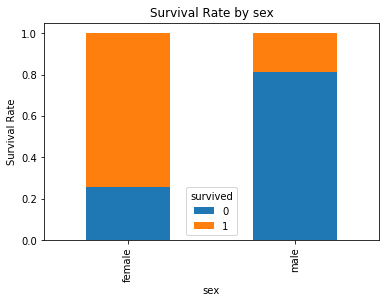

In [17]:
sex_xt = pd.crosstab(df_train['sex'], df_train['survived'])
sex_xt_pct = sex_xt.div(sex_xt.sum(1).astype(float), axis=0)
sex_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by sex')
plt.xlabel('sex')
plt.ylabel('Survival Rate')

sex also has significant impact on the survival feature, survival rate of female is higher than the male

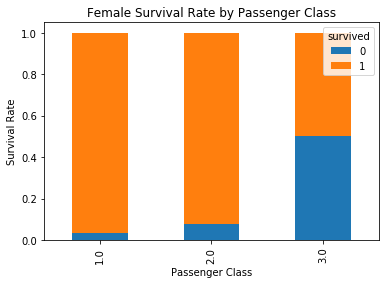

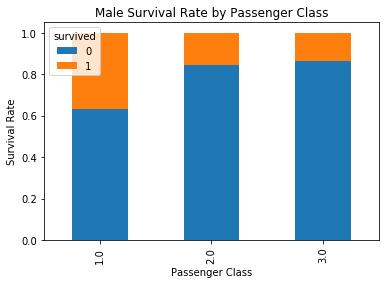

In [18]:
# Plot for females in three classes
females_df = df_train[df_train['sex'] == 'female']
females_xt = pd.crosstab(females_df['pclass'], df_train['survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# plot for males in three classes
males_df = df_train[df_train['sex'] == 'male']
males_xt = pd.crosstab(males_df['pclass'], df_train['survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Feature : age

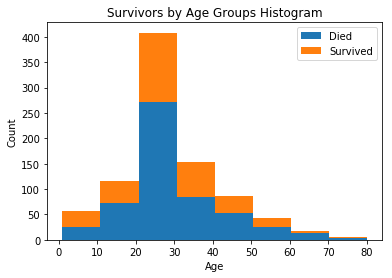

In [19]:
df1 = df_train[df_train['survived'] == 0]['age']
df2 = df_train[df_train['survived'] == 1]['age']
max_age = max(df_train['age'])
bin_size=10
plt.hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age), 
             stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')

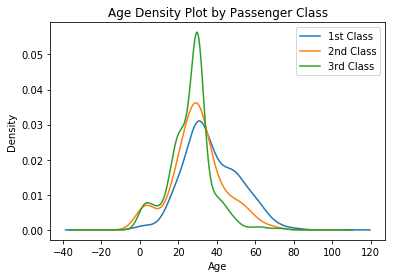

In [20]:
for Pclass in sorted(df_train['pclass'].unique()):
    df_train.age[df_train.pclass == Pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

# Feature: Familysize = parch+sibsp

In [21]:
df_train['familysize'] = df_train['parch']+df_train['sibsp'] 

# Final data 

In [22]:
df_train.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title,familysize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0
5,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,Q,Mr,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,1


In [23]:
# Drop the irrevelent columns
# name,sibsp,parch,ticket

In [24]:
df_train = df_train.drop(['name','sibsp','parch','ticket'],axis=1)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           891 non-null float64
fare          891 non-null float64
embarked      891 non-null object
title         891 non-null object
familysize    891 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [26]:
# conververting the object features into int 

In [27]:
from sklearn.preprocessing import LabelEncoder 
labels = LabelEncoder().fit(df_train['sex'])
df_train['sex'] = labels.transform(df_train['sex'])

labels = LabelEncoder().fit(df_train['embarked'])
df_train['embarked'] = labels.transform(df_train['embarked'])

labels = LabelEncoder().fit(df_train['title'])
df_train['title'] = labels.transform(df_train['title'])

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null int64
age           891 non-null float64
fare          891 non-null float64
embarked      891 non-null int64
title         891 non-null int64
familysize    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [29]:
train = np.array(df_train)

In [30]:
x_train = train[:,1:]
y_train = train[:,0]

# Validation_

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train[:,1:], train[:,0], test_size=0.20, random_state=42)

# Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = 100, oob_score=True)
clf = clf.fit(X_train,y_train)
print('oob_score:\t\t',clf.oob_score_)
y_valid_pred = clf.predict(X_valid)
c = accuracy_score(y_valid, y_valid_pred)
print('valid acc:\t\t',c)

oob_score:		 0.790730337079
valid acc:		 0.832402234637


In [91]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [92]:
classifiers = [LinearDiscriminantAnalysis(),
               LogisticRegression(),
               KNeighborsClassifier(3),
               SVC(kernel="linear"),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               RandomForestClassifier(n_estimators = 100),
               DecisionTreeClassifier(),]

In [93]:
for clf in classifiers:
    #Training classifier
    print(clf)
    clf.fit(X_train,y_train)
    print("____")
    #testin classifier on test data
    y_valid_pred = clf.predict(X_valid)
    score = accuracy_score(y_valid, y_valid_pred)
    print("accuracy:\t\t",score)
    print("____")
    print("____")

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
____
accuracy:		 0.793296089385
____
____
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
____
accuracy:		 0.793296089385
____
____
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
____
accuracy:		 0.720670391061
____
____
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
____
accuracy:		 0.782122905028
____
____
AdaBoostClassifier(algorithm='SAMME.R

# Prediction on test set

In [33]:
df_test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
pclass      418 non-null int64
name        418 non-null object
sex         418 non-null object
age         332 non-null float64
sibsp       418 non-null int64
parch       418 non-null int64
ticket      418 non-null object
fare        417 non-null float64
cabin       91 non-null object
embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 32.7+ KB


In [35]:
df_test = df_test.drop('cabin',1)

In [36]:
temp_title = df_test['name'].str.split(', ').str[1]
df_test['title']=temp_title.str.split('.').str[0]

df_test['title'].replace('Ms','Miss',inplace = True)
df_test['title'].replace('Mlle','Miss',inplace = True)
df_test['title'].replace('the Countess','Lady',inplace = True)
df_test['title'].replace('Mme','Mrs',inplace = True)
df_test['title'].replace('Jonkheer','Sir',inplace = True)
df_test['title'].replace('Don','Sir',inplace = True)
df_test['title'].replace('Col','Officer',inplace = True)
df_test['title'].replace('Capt','Officer',inplace = True)
df_test['title'].replace('Major','Officer',inplace = True)

df_test['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Officer', 'Rev', 'Dr', 'Dona'], dtype=object)

In [37]:
missing_age_df = df_test[df_test['age'].isnull()]
missing_age_df['title'].unique()

for i in missing_age_df['title'].unique():
    median = df_test.age[df_test['title']==i].median()
    df_test.age[df_test['age'].isnull()] = median    
    #mean(df_train['age']]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
df_test['familysize'] = df_test['parch']+df_test['sibsp'] 

In [39]:
df_test = df_test.drop(['name','sibsp','parch','ticket'],axis=1)

In [40]:
labels = LabelEncoder().fit(df_test['sex'])
df_test['sex'] = labels.transform(df_test['sex'])

labels = LabelEncoder().fit(df_test['embarked'])
df_test['embarked'] = labels.transform(df_test['embarked'])

labels = LabelEncoder().fit(df_test['title'])
df_test['title'] = labels.transform(df_test['title'])

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
pclass        418 non-null int64
sex           418 non-null int64
age           418 non-null float64
fare          417 non-null float64
embarked      418 non-null int64
title         418 non-null int64
familysize    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [46]:
df_test[df_test.isnull().any(axis=1)]

,pclass,sex,age,fare,embarked,title,familysize
152,3,1,60.5,NaN,2,4,0


In [47]:
#df_test[df_test['pclass']==3].fillna(df_test.mean())
df_test['fare'] = df_test['fare'].groupby(df_test['pclass']).apply(lambda x: x.fillna(x.mean()))

In [48]:
test = np.array(df_test)
test_y = clf.predict(test)

# Kaggle submission

In [64]:
submission = pd.DataFrame({
        "PassengerId": list(range(892,1310)),
        "Survived": test_y.astype('int')
    })
submission.to_csv('/home/srikanth/Desktop/python/kaggle_/titanic/gender_submission.csv', index=False)

# we will use this data for building the neural network

In [66]:
df_test.to_csv('/home/srikanth/Desktop/python/kaggle_/titanic/test_preprocessed.csv', index=False)
df_train.to_csv('/home/srikanth/Desktop/python/kaggle_/titanic/train_preprocessed.csv', index=False)